In [20]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # para dibujar una proyección 3D
matplotlib.rc("font", size=10) # aumentar el tamaño de letra de los títulos de los gráficos

In [21]:
houses = pd.read_csv(r'C:\Users\Ульяна\Desktop\jupiter\datasets\1.4_houses.csv')

In [22]:
houses.head(10)

,dim_1,dim_2,level,price
0,29,28,luxury,2212.0
1,28,29,luxury,2203.0
2,6,9,basic,254.0
3,5,9,basic,242.0
4,6,6,basic,195.0
5,5,8,basic,200.0
6,27,29,luxury,2108.0
7,23,14,medium,998.0
8,9,5,basic,225.0
9,29,26,luxury,2052.0


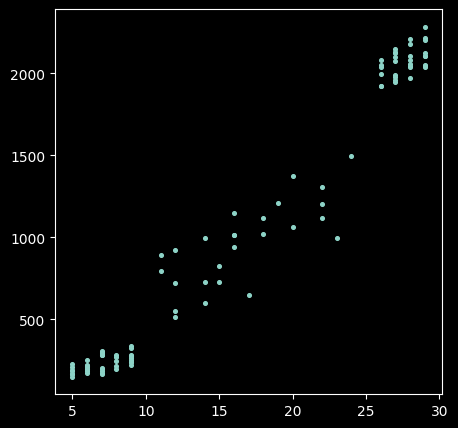

In [23]:
fig = plt.figure(figsize=(5, 5)) # wireframe
ax = plt.axes()
ax.scatter(houses["dim_2"], houses["price"], s=7) # poner los puntos en el gráfico 

In [25]:
# importar el módulo responsable de la regresión lineal
from sklearn.linear_model import LinearRegression

In [26]:
# descargar atributos y valores objetivo en variables separadas
X = houses[["dim_1"]]
y = houses["price"]

In [27]:
# Regressor
reg = LinearRegression().fit(X, y)

[b] = reg.coef_
a = reg.intercept_

# crear una función para predecir el precio de una casa
def reg_prediction(dim_1):
    return a + b * dim_1

In [28]:
reg.predict(X[0:1])[0] # precio previsto de la primera vivienda

2057.887633711507

In [ ]:
#Aquí, X[0:1]se refiere a la primera fila de la matriz de características X. A continuación, utilizamos el método predict() del objeto modelo reg para predecir el precio de esta vivienda. Por último, utilizamos [0]
# para extraer el precio predicho de la matriz de resultados (ya que el método predict() siempre devuelve una matriz de longitud n, donde n es el número de filas de la matriz X)

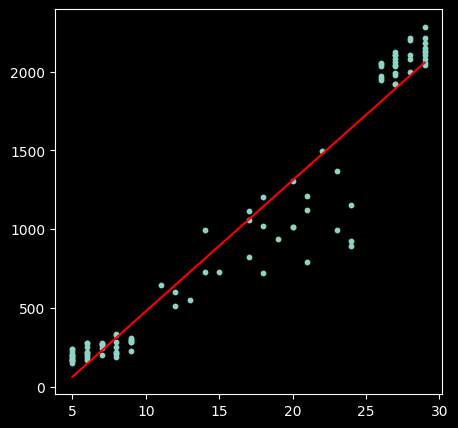

In [31]:
fig = plt.figure(figsize=(5, 5)) # imagen
ax = plt.axes()
# trazar los puntos
ax.scatter(houses["dim_1"], houses["price"], s=10)
# predicciones de clasificación
ax.plot([X.dim_1.min(), X.dim_1.max()], [reg_prediction(X.dim_1.min()), reg_prediction(X.dim_1.max())], c="red")
# mostrar la imagen
plt.show()

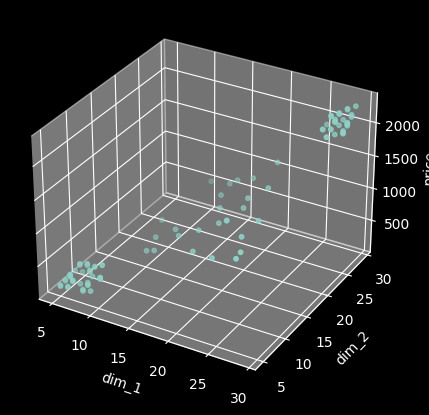

In [34]:
fig = plt.figure(figsize=(5, 5)) # 3D
ax = plt.axes(projection="3d") # proyección
# trazar los puntos
ax.scatter(houses["dim_1"], houses["dim_2"], houses["price"], s=10)
ax.set_xlabel("dim_1")
ax.set_ylabel("dim_2")
ax.set_zlabel("price")
plt.show()

In [35]:
# descargar atributos y valores objetivo en variables separadas (+dim_2)
X = houses[["dim_1", "dim_2"]]
y = houses["price"]

reg = LinearRegression().fit(X, y)

# extraer los coeficientes deseados
[b1, b2] = reg.coef_
a = reg.intercept_

def reg_prediction(dim_1, dim_2):
    return a + b1 * dim_1 + b2 * dim_2

reg_prediction(X.dim_1[0], X.dim_2[0])


2080.82359179565

In [36]:
# hacer predicciones para diferentes configuraciones de la casa
d1, d2 = list(), list()
for x in np.linspace(min(houses["dim_1"]), max(houses["dim_1"]), 100):
    for y in np.linspace(min(houses["dim_2"]), max(houses["dim_2"]), 100):
        d1.append(x)
        d2.append(y)
d1 = np.array(d1).reshape(-1, 1)
d2 = np.array(d2).reshape(-1, 1)
p = reg.predict(np.concatenate([d1, d2], axis=1))

C:\Users\Ульяна\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


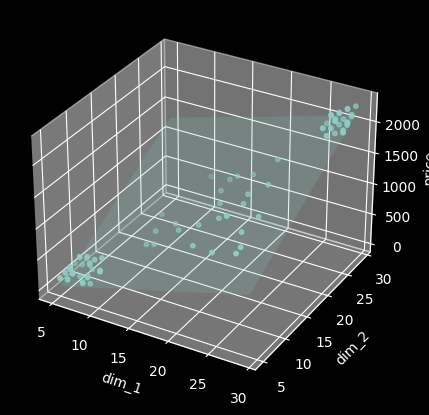

In [38]:
fig = plt.figure(figsize=(5, 5)) 
ax = plt.axes(projection="3d") 


ax.scatter(houses["dim_1"], houses["dim_2"], houses["price"], s=10)


ax.plot_trisurf(d1.ravel(), d2.ravel(), p.ravel(), alpha=0.2)
ax.set_xlabel("dim_1")
ax.set_ylabel("dim_2")
ax.set_zlabel("price")

ax.elev = 30
plt.show()